In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.9 ms


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import warnings
import pickle
from scipy.spatial import distance
warnings.filterwarnings("ignore")

In [ ]:
# Image plot
def img_plot(im):
  plt.figure(figsize=(5,5))
  plt.imshow(im,cmap='gray')
  plt.show()

# PSNR
def PSNR(I1,I2): 
    MSE = I1 - I2
    MSE = MSE**2
    MSE = np.mean(MSE) 
    p = 20*math.log10(255.0) - 10*math.log10(MSE+0.00001)
    return p 

# Local Denoise
def NonLocalDenoise(im,shape = (3,3),h=2):
  (a,b) =  shape
  imb = cv2.copyMakeBorder(im, a//2, a//2, b//2, b//2,cv2.BORDER_REPLICATE)
  imnew = im
  ha = a//2
  hb = b//2
  Nw = (2 * a + 1) 

  for i in range(a,im.shape[0]-a,a):
    for j in range(b,im.shape[1]-b,b):

      t =  imb[i-ha:i+ha+1,j-hb:j+hb+1]
      normal = 0
      weight = 0
      tf = list(t.flatten())
      
      for k in range(0,im.shape[0]-a,1):
        for l in range(0,im.shape[1]-b,1):
          if k == i and l ==j:
              continue
          else:  
            if k<a:
              k =a
            if l<b:
              l =b
            if k>imb.shape[0]-a:
              k = imb.shape[0]-a
            if l>imb.shape[1]-b:
              l = imb.shape[1]-b  

          p = imb[k-hb:k+ha+1,k-hb:k+hb+1]
          
          pf = list(p.flatten())
          temp = distance.cosine(tf,pf)
          weight = weight  + imb[k,l]*temp
          normal = normal + temp
                
      imnew [i-ha,j-hb] = weight/normal

  return imnew


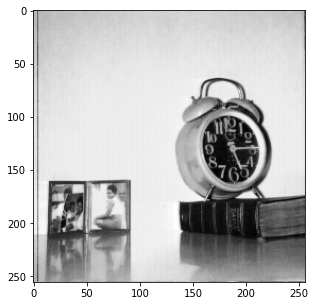

(256, 256)


In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Test_Images/5.1.12.tiff'
im = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_plot(im)
print(im.shape)

In [ ]:
# Local Denoising Filtering  : shape=(5,5),var=10 
psnr = []
img = []
for i in range(1):
  noise = np.random.normal(0,10**0.5,size= im.shape)
  imn = im + noise
  imnew  =  NonLocalDenoise(imn,shape = (13,13))
  img.append(imnew)

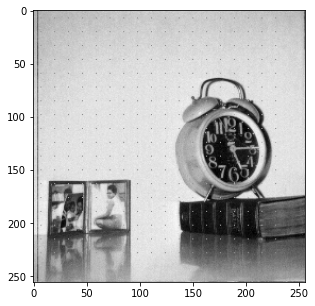

32.526551051364024


In [ ]:
img_plot(img[0])
print(PSNR(im,img[0]))

In [ ]:
# time: 4h 9min 28s

In [ ]:
# psnr = []
# for i in range(10):
#   psnr.append(PSNR(im,img[i]))
# print(round(sum(psnr)/len(psnr),3))

26.69
time: 12.4 ms


In [ ]:
# path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(5)+str(10)
# with open(path+'nonimage.pkl', "wb") as f: 
#   pickle.dump(img, f)
# with open(path+'nonpsnr.pkl', "wb") as f: 
#   pickle.dump(psnr, f)

time: 512 ms


In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(5)+str(10)
with open(path+'nonpsnr.pkl', "rb") as fp:
  psnr = pickle.load(fp)  
print(round(sum(psnr)/len(psnr),3))  

26.69
time: 376 ms


In [ ]:
# path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(5)+str(10)
# with open(path+'nonimage.pkl', "rb") as fp:
#   images = pickle.load(fp)
# for i in range(10):
#   img_plot(images[i])

time: 791 µs


In [ ]:
# Local Denoising Filtering  : shape=(9,9),var=10
# img = []
# for i in range(10):
#   noise = np.random.normal(0,10**0.5,size= im.shape)
#   imn = im + noise
#   imnew  =  NonLocalDenoise(imn,shape = (9,9))
#   img.append(imnew)  

time: 1h 36min 1s


In [ ]:
# time: 1h 36min 1s

In [ ]:
# psnr = []
# for i in range(10):
#   psnr.append(PSNR(im,img[i]))
# print(round(sum(psnr)/len(psnr),3))

28.003
time: 8.81 ms


In [ ]:
# path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(9)+str(10)
# with open(path+'nonimage.pkl', "wb") as f: 
#   pickle.dump(img, f)
# with open(path+'nonpsnr.pkl', "wb") as f: 
#   pickle.dump(psnr, f)

time: 1.53 s


In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(9)+str(10)
with open(path+'nonpsnr.pkl', "rb") as fp:
  psnr = pickle.load(fp)
print(round(sum(psnr)/len(psnr),3))  

28.003
time: 627 ms


In [ ]:
# # Local Denoising Filtering  : shape=(5,5),var=50 
# psnr = []
# img = []
# for i in range(10):
#   noise = np.random.normal(0,50**0.5, size= im.shape)
#   imn = im + noise
#   imnew  =  NonLocalDenoise(imn,shape = (5,5))
#   img.append(imnew)

time: 4h 5min 55s


In [ ]:
# time: 4h 5min 55s

In [ ]:
# psnr = []
# for i in range(1):
#   psnr.append(PSNR(im,img[i]))
# print(sum(psnr)/len(psnr))

In [ ]:
# path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(5)+str(50)
# with open(path+'nonimage.pkl', "wb") as f: 
#   pickle.dump(img, f)
# with open(path+'nonpsnr.pkl', "wb") as f: 
#   pickle.dump(psnr, f)

time: 17.2 ms


In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(5)+str(50)
with open(path+'nonpsnr.pkl', "rb") as fp:
  psnr = pickle.load(fp)
print(round(sum(psnr)/len(psnr),3))  

25.614
time: 654 ms


In [ ]:
# Local Denoising Filtering  : shape=(9,9),var=50 
# psnr = []
# img = []
# for i in range(10):
#   noise = np.random.normal(0,50**0.5,size= im.shape)
#   imn = im + noise
#   imnew  =  NonLocalDenoise(imn,shape = (9,9))
#   img.append(imnew)

time: 1h 12min 6s


In [ ]:
# time: 1h 12min 6s

In [ ]:
# psnr = []
# for i in range(1):
#   psnr.append(PSNR(im,img[i]))
# print(sum(psnr)/len(psnr))

26.291342071565218
time: 4.07 ms


In [ ]:
# path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(9)+str(50)
# with open(path+'nonimage.pkl', "wb") as f: 
#   pickle.dump(img, f)
# with open(path+'nonpsnr.pkl', "wb") as f: 
#   pickle.dump(psnr, f)

time: 1.36 s


In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Saved_Data/'+str(9)+str(50)
with open(path+'nonpsnr.pkl', "rb") as fp:
  psnr = pickle.load(fp)
print(round(sum(psnr)/len(psnr),3)) 

26.291
time: 339 ms
